In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zepto-inventory-dataset/zepto_v2.csv
/kaggle/input/zepto-inventory-dataset/zepto_v1.xlsx


# Data loading and preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/zepto-inventory-dataset/zepto_v2.csv',encoding='latin1')
df

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250
...,...,...,...,...,...,...,...,...,...
3727,Health & Hygiene,Stayfree Secure Dry Cover Extra Large Sanitary...,4200,2,0,4100,406,True,7
3728,Health & Hygiene,Dabur Honitus Herbal Cough Remedy Ayurvedic Syrup,10500,15,0,8900,100,True,100
3729,Health & Hygiene,Whisper Bindazzz Night Sanitary Pads XL Plus,18500,0,0,18500,870,True,15
3730,Health & Hygiene,Fine Life Cotton Balls,6000,0,0,6000,50,True,50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Category                3732 non-null   object
 1   name                    3732 non-null   object
 2   mrp                     3732 non-null   int64 
 3   discountPercent         3732 non-null   int64 
 4   availableQuantity       3732 non-null   int64 
 5   discountedSellingPrice  3732 non-null   int64 
 6   weightInGms             3732 non-null   int64 
 7   outOfStock              3732 non-null   bool  
 8   quantity                3732 non-null   int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 237.0+ KB


In [4]:
df.isna().sum()

Category                  0
name                      0
mrp                       0
discountPercent           0
availableQuantity         0
discountedSellingPrice    0
weightInGms               0
outOfStock                0
quantity                  0
dtype: int64

* Excel file

In [5]:
df_ex = pd.read_excel('/kaggle/input/zepto-inventory-dataset/zepto_v1.xlsx')
df_ex

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250
...,...,...,...,...,...,...,...,...,...
3727,Health & Hygiene,Stayfree Secure Dry Cover Extra Large Sanitary...,4200,2,0,4100,406,True,7
3728,Health & Hygiene,Dabur Honitus Herbal Cough Remedy Ayurvedic Syrup,10500,15,0,8900,100,True,100
3729,Health & Hygiene,Whisper Bindazzz Night Sanitary Pads XL Plus,18500,0,0,18500,870,True,15
3730,Health & Hygiene,Fine Life Cotton Balls,6000,0,0,6000,50,True,50


# Vizualization Section

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set_style('whitegrid')

In [8]:
cols = ['Category', 'name', 'mrp', 'discountPercent', 'availableQuantity',
       'discountedSellingPrice', 'weightInGms', 'outOfStock', 'quantity']

# Histogrma plot

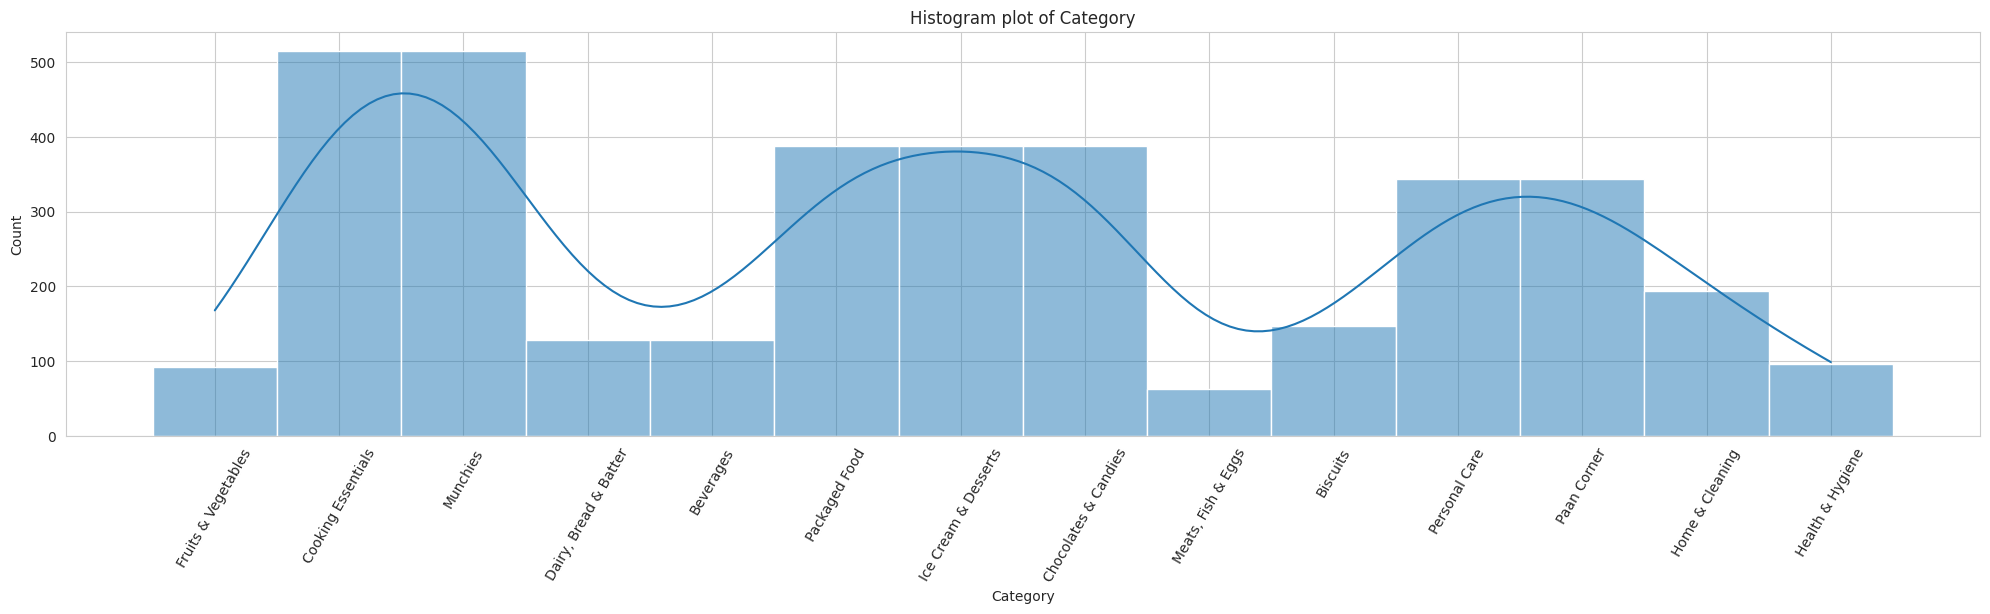

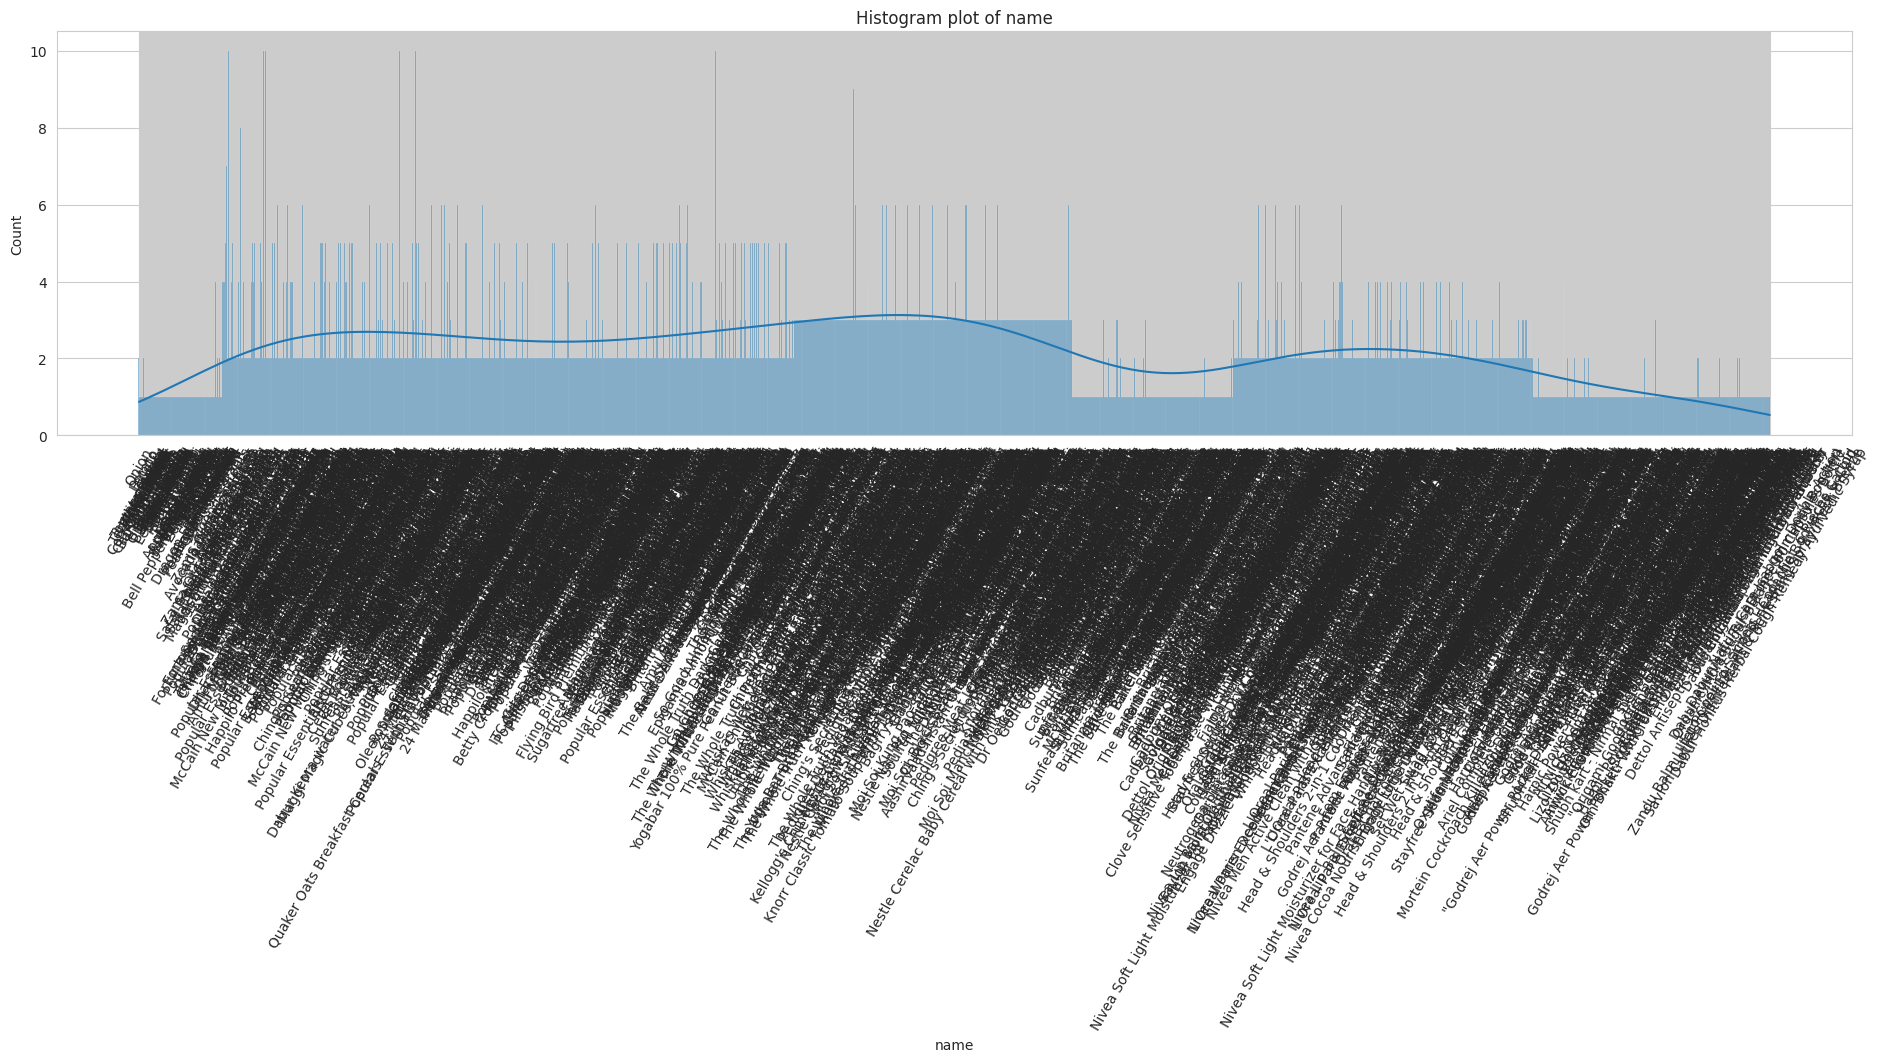

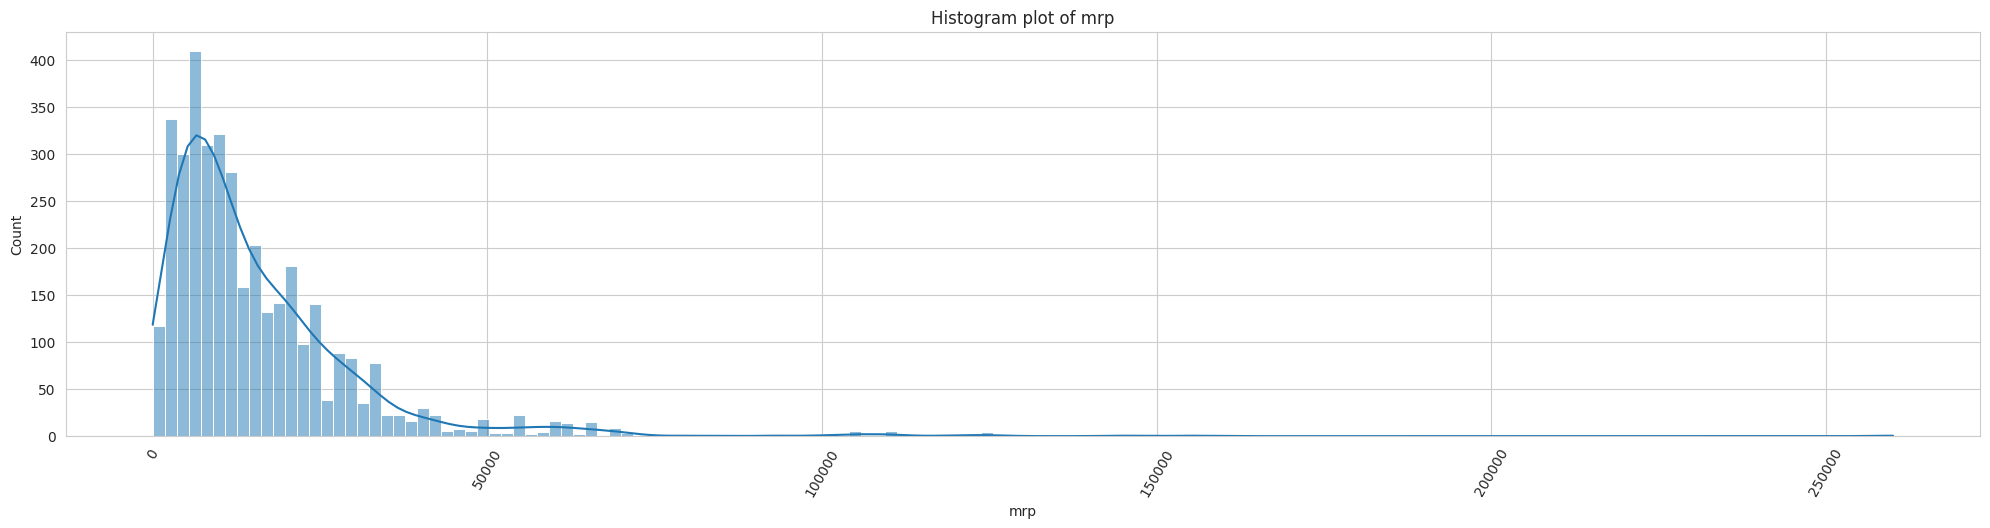

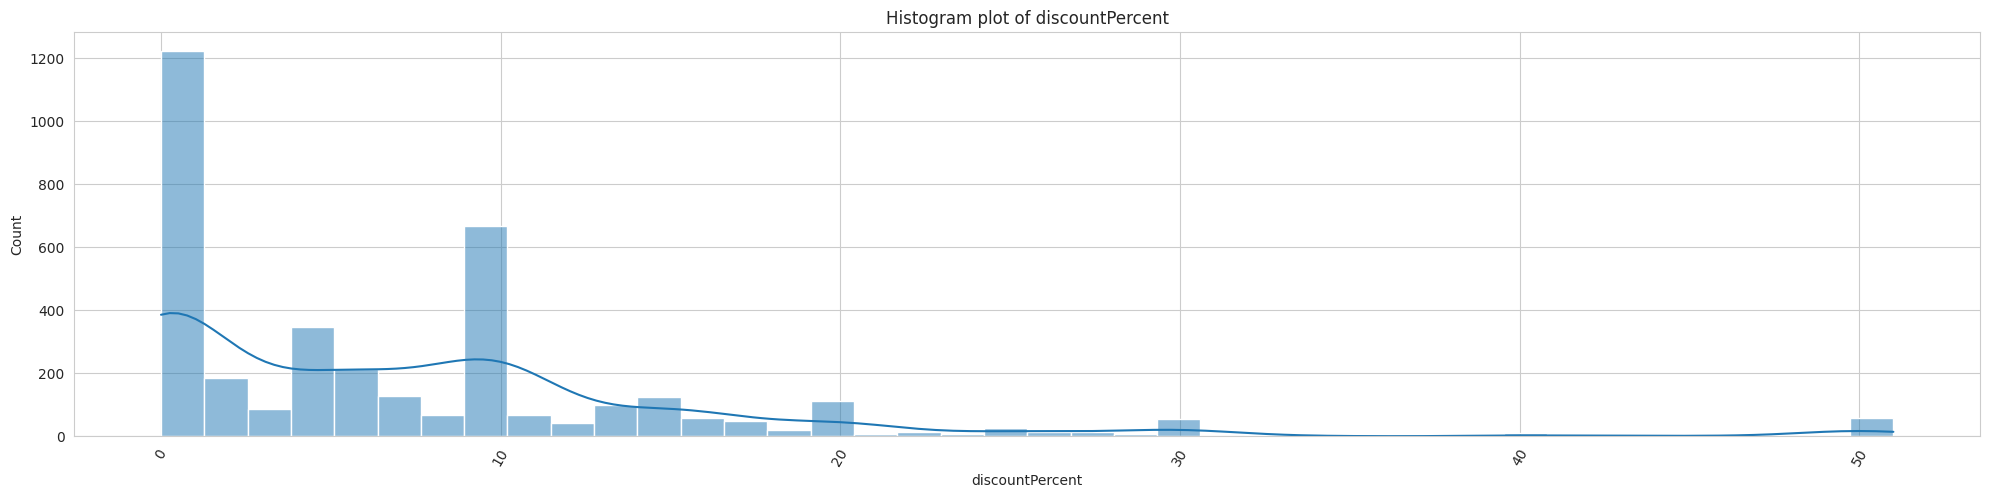

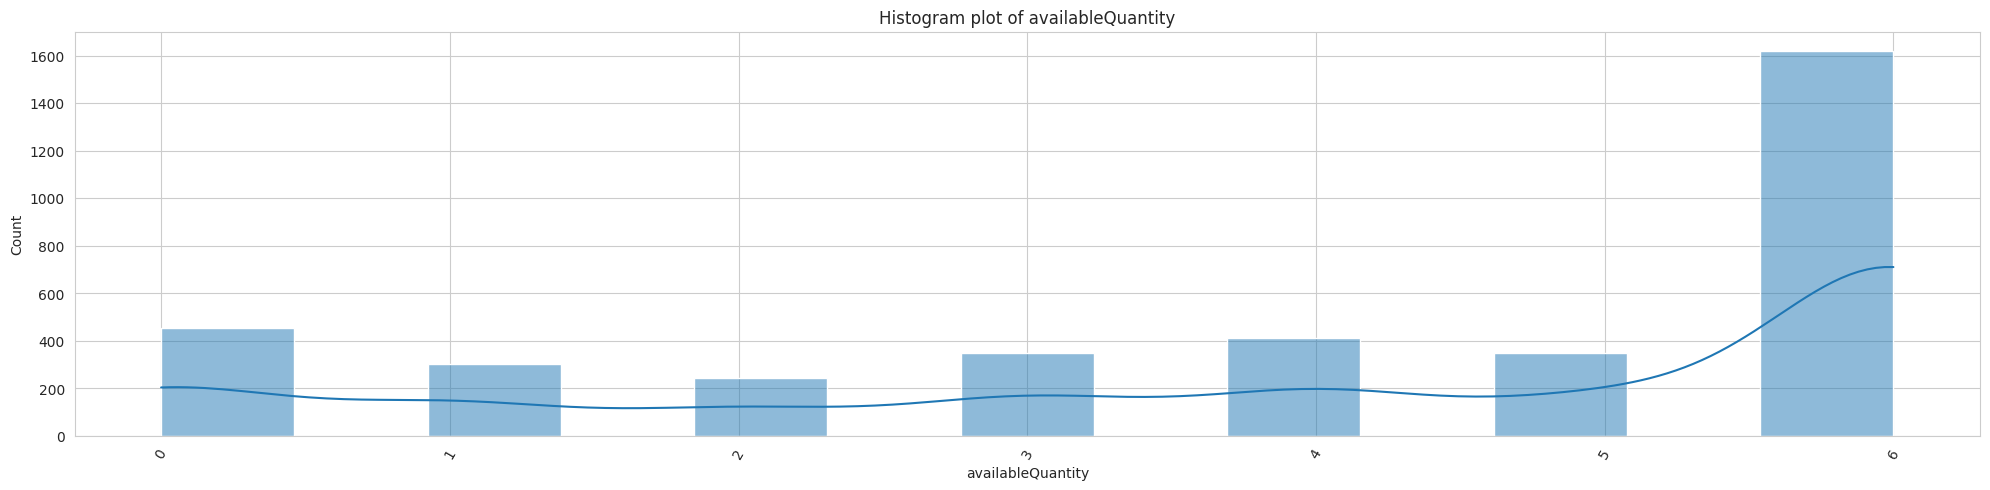

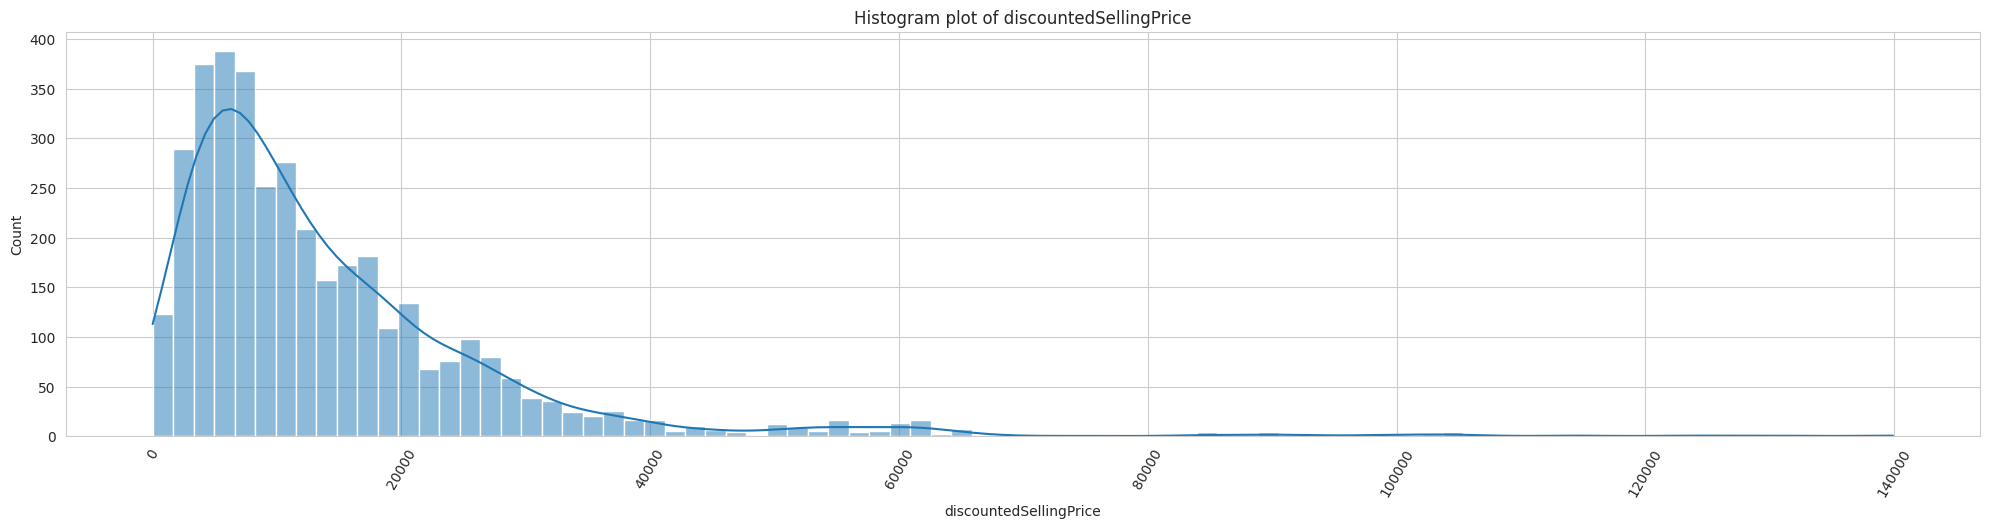

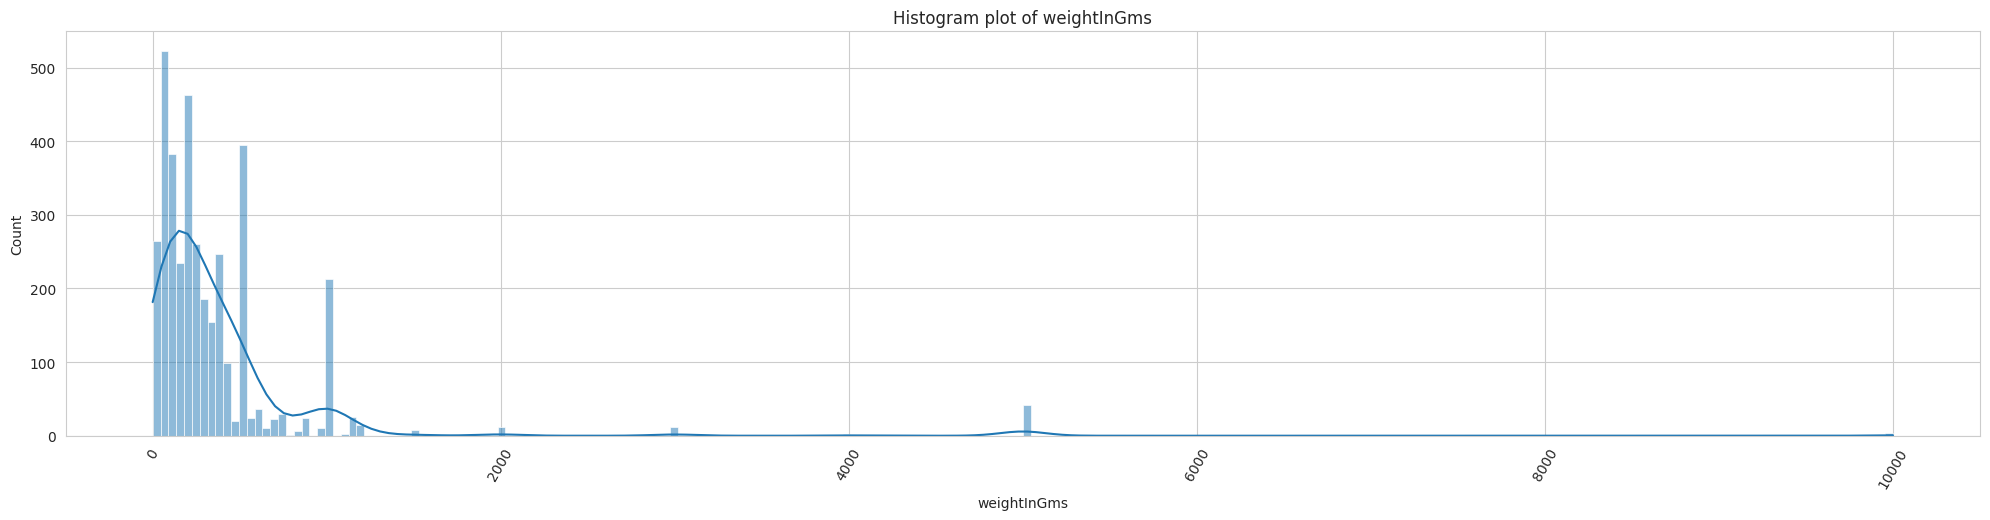

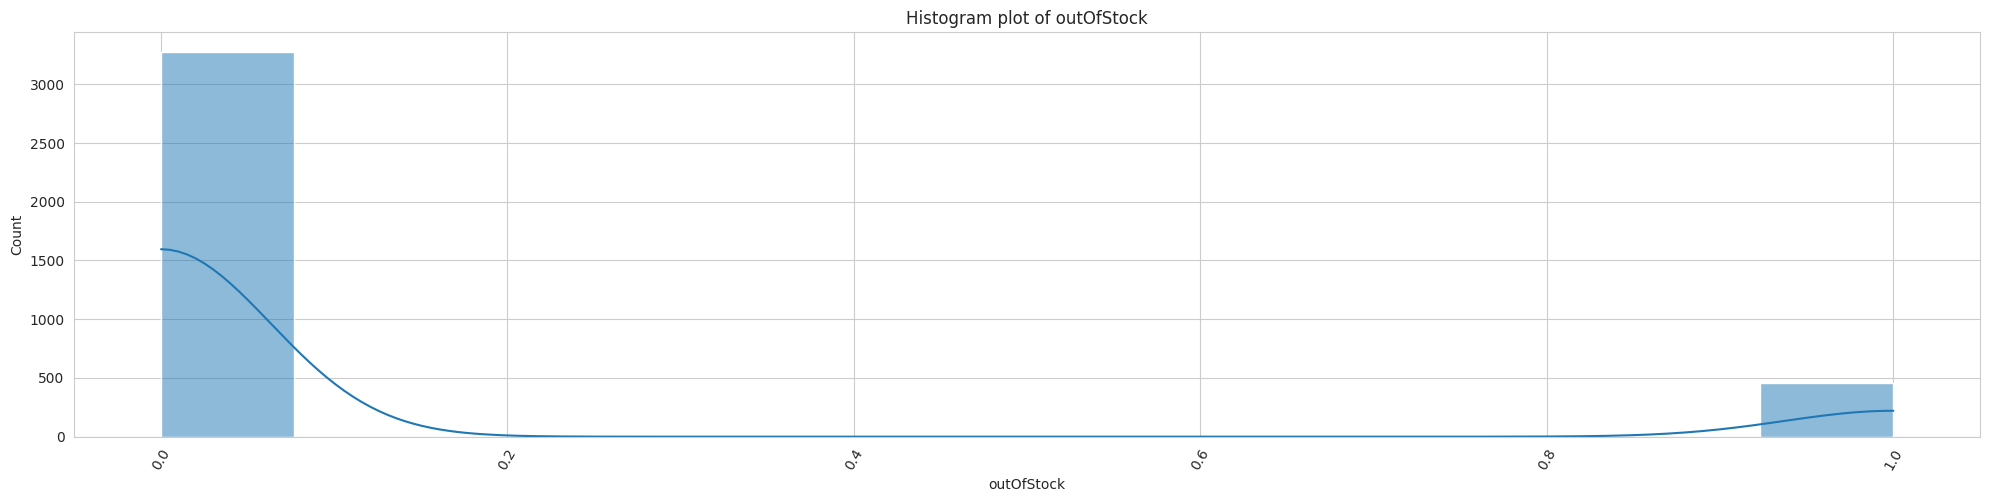

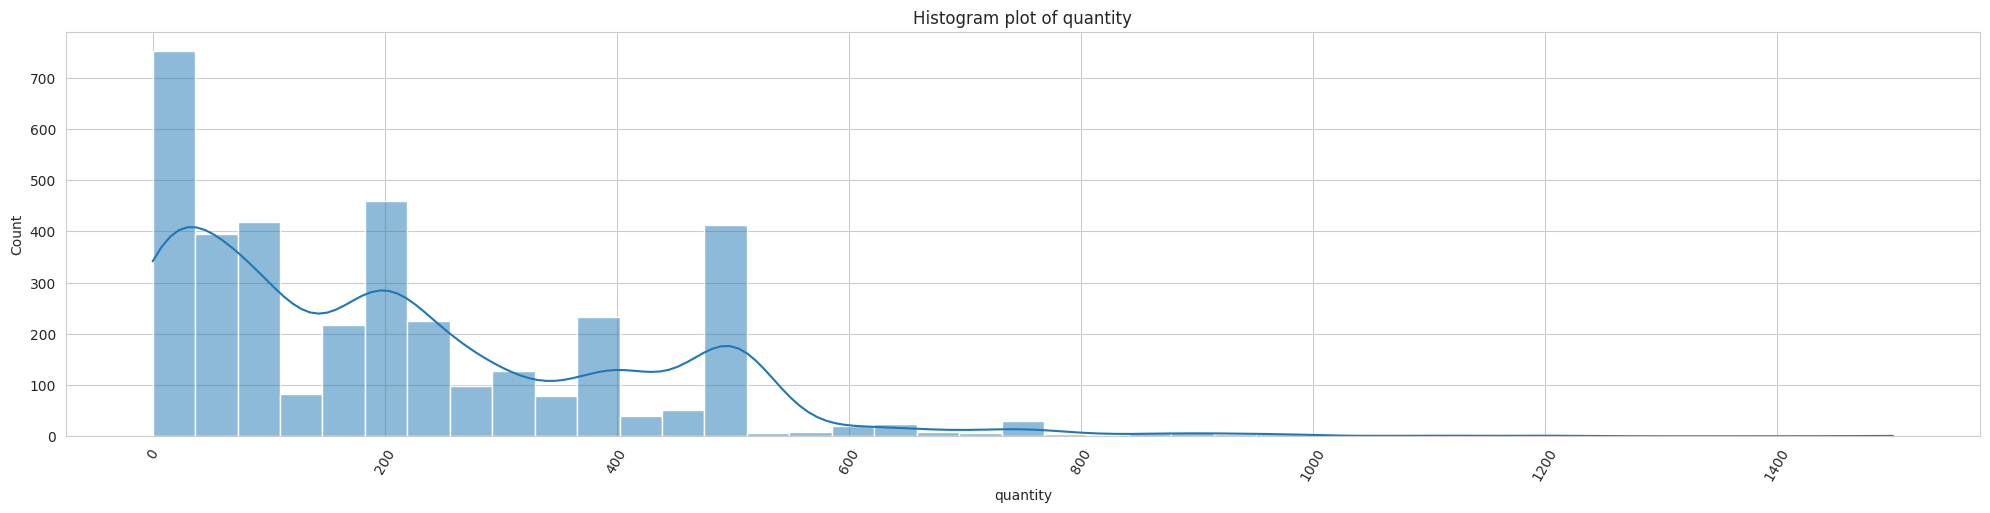

In [9]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.histplot(df[features].dropna(),kde=True)
        plt.title(f"Histogram plot of {features}")
        plt.xlabel(features)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.xticks(rotation=60)
        plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Category                3732 non-null   object
 1   name                    3732 non-null   object
 2   mrp                     3732 non-null   int64 
 3   discountPercent         3732 non-null   int64 
 4   availableQuantity       3732 non-null   int64 
 5   discountedSellingPrice  3732 non-null   int64 
 6   weightInGms             3732 non-null   int64 
 7   outOfStock              3732 non-null   bool  
 8   quantity                3732 non-null   int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 237.0+ KB


# Feature Engineering

In [11]:
lab_cols = ['Category','name','outOfStock']

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
for column in lab_cols:
    df[column] = le.fit_transform(df[column])

In [15]:
df

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,5,1046,2500,16,3,2100,1000,0,1
1,5,1551,4200,16,3,3500,1000,0,1
2,5,1500,5100,15,3,4300,58,0,1
3,5,351,2000,15,3,1700,100,0,100
4,5,835,1400,14,3,1200,250,0,250
...,...,...,...,...,...,...,...,...,...
3727,6,1408,4200,2,0,4100,406,1,7
3728,6,391,10500,15,0,8900,100,1,100
3729,6,1632,18500,0,0,18500,870,1,15
3730,6,559,6000,0,0,6000,50,1,50


# ANN Section

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,r2_score,mean_absolute_error,mean_squared_error,classification_report

In [17]:
import tensorflow as tf

2025-06-04 15:02:58.766724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749049379.024671      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749049379.096824      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
import shap

In [19]:
X = df.drop(df.columns[-2],axis=1)
y = df.iloc[:,-2]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1)
])

2025-06-04 15:03:24.131249: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [23]:
model.compile(optimizer=Adam(),loss='mean_squared_error',metrics=['mse'])
model.fit(X_train_scaled,y_train,epochs=10,batch_size=32,validation_split=0.1)


y_pred = model.predict(X_test_scaled)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

print(classification_report(y_test,y_pred_labels))

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0675 - mse: 0.0675 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062 - mse: 

In [24]:
# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert probabilities to class labels
y_train_pred_labels = (y_train_pred > 0.5).astype(int)
y_test_pred_labels = (y_test_pred > 0.5).astype(int)

# Evaluate
from sklearn.metrics import classification_report

print("Train Report:")
print(classification_report(y_train, y_train_pred_labels))

print("Test Report:")
print(classification_report(y_test, y_test_pred_labels))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2631
           1       0.12      1.00      0.21       354

    accuracy                           0.12      2985
   macro avg       0.06      0.50      0.11      2985
weighted avg       0.01      0.12      0.03      2985

Test Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       648
           1       0.13      1.00      0.23        99

    accuracy                           0.13       747
   macro avg       0.07      0.50      0.12       747
weighted avg       0.02      0.13      0.03       747



Conclusion:

>Current ANN is severely underperforming and overfitting to the minority class.

>You should address class imbalance and retrain with class_weight, SMOTE, or both.

>After fixing, re-run the classification report to see improvements in both recall and precision across both classes.